# Machine Learning Analysis of Heart Disease Data
In this file we will be exploring our data through machine learning methods in the library sklearn. We wanted to expand on our machine learning knowledge by exploring different models in the library. We will be analyzing our data with K Nearest Neighbors to create a model that will hopefully better predict whether or not someone has heart disease. We will will create different versions of this model using all given data and our most significant values. We will then be exploring their effectiveness by scoring them based on a confusion matrix, accuracy, recall, precision, and f1 scores which are very common in analyzing a confusion matrix.

Importing libraries:

In [60]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

Read in data:

In [61]:
heart = pd.read_csv('heart_disease_uci.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## KNeighborsClassifier
For our machine learning analysis, we started by looking at the `KNeighborsClassifier` to create a model that could help predict the heart disease stage for patients in the future considering our variables, and our most influential variables.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In order for our model to run, there cannot be any NA values. For running our model will all the given data, we will drop all NAs.

In [63]:
heart = heart.dropna()

In [64]:
y = heart.num
X0 = heart.drop("num", axis=1)
X0 = pd.get_dummies(X0, drop_first=True)
X0.shape

(299, 21)

Here I will first run the KNeighbors model with a value of one to make sure the model is working correctly. In this analysis we get an accuracy of 1 and a rmse of 0. This is expected as the model is overfit.

In [65]:
m = KNeighborsClassifier(1)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(1.0, 0.0)

Here I am testing the model on a higher value to make sure we do not get overfit scores such as accuracy = 1 and rmse = 0. You can see I get a much lower accuracy and higher rmse. This leads me to believe the ideal number of neighbors will be lower than 10.

In [66]:
m = KNeighborsClassifier(10)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(0.5785953177257525, 1.4035311416394862)

Now I am going to conduct my actual analysis. I will be using a for loop to run testing and training data through my model to determine the ideal number of neighbors. I will graph the training anf testing accuracy, and then find where the testing accuracy is most accurate to find the ideal number of neighbors.

In [67]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X0, y)

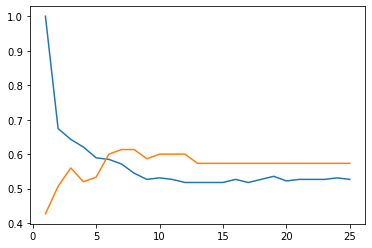

In [68]:
ks = range(1, 26)
accurt = []
accurv = []
for k in ks:
    m = KNeighborsClassifier(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

We find here that the ideal number of neighbors in our model trained on all columns of the dataset is 6.

In [69]:
maxi = max(accurv)
index = accurv.index(maxi)
index

6

In order to analyze our model using a confusion matrix we are going to simplify our data by seperating patients in two categories `has_disease` = 1 and = 0. We will then run our model trying to predict this outcome and analyze the accuracy of the results.

In [70]:
heart['has_disease'] = (heart.num > 0) + 0
heart.head()

C:\Users\efgro\AppData\Local\Temp\ipykernel_22692\1884039871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['has_disease'] = (heart.num > 0) + 0


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,has_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [86]:
y = heart.has_disease
X0 = heart.drop("has_disease", axis=1)
X0 = heart.drop("num", axis=1)
X0 = pd.get_dummies(X0, drop_first=True)
X0.shape

(299, 22)

Here I am going to test it on our previously determined ideal number of neighbors, and see how accurate our model is.

In [72]:
m = KNeighborsClassifier(8)
_ = m.fit(X0, y)
yhat = m.predict(X0)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y, yhat)

array([[130,  30],
       [ 70,  69]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [76]:
accuracy_score(y, yhat)

0.6655518394648829

For our model, we see the accuracy is pretty low around 67%.

Now I am going to run the model again and see if our ideal number of neighbors has changed since changing to the binary `has_disease` variable.

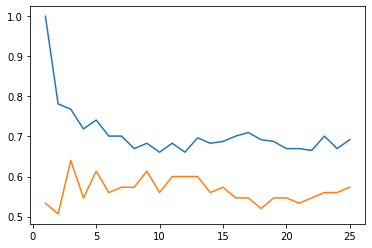

In [77]:
ks = range(1, 26)
accurt = []
accurv = []
Xt, Xv, yt, yv = train_test_split(X0, y)
for k in ks:
    m = KNeighborsClassifier(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

Here we see the new ideal number is 2 neighbors, which has decreased since our last running of the for loop. This `has_disease` variable is affecting our model.

In [78]:
maxi = max(accurv)
index = accurv.index(maxi)
index

2

In [87]:
m = KNeighborsClassifier(2)
_ = m.fit(X0, y)
yhat = m.predict(X0)
confusion_matrix(y, yhat)

array([[160,   0],
       [ 71,  68]], dtype=int64)

These scores come directly from the confusion matrix. Our accuracy tells us how many true positive and tru negatives values we got out of the total number of values. This gives us an accuracy of 76%. Our recall score tells us how many true positives we got out of all actual positives in the dataset, which we got 49%. This is very low, especially considering how important it is to eliminate false negatives in this analysis. Not catching heart disease is the worst outcome from our model. Our precision score tells us how many true positives we got out of all predicted positives, which in this model we got all of them! Lastly, the F1 score takes both recall and precision in account in better efforts to make sure the model is not easily fooled by overfitting, and we get a score of 66% which is not ideal.

In [88]:
accuracy_score(y, yhat), recall_score(y, yhat), precision_score(y, yhat), f1_score(y, yhat)

(0.7625418060200669, 0.4892086330935252, 1.0, 0.6570048309178744)

Now I am going to start working with just our most influential values that we found when analyzing with statsmodels. I will load the heart disease data again, and now delete NAs only from the 3 influential values that I incorporated to give us the most complete data as possible.

In [98]:
heart = pd.read_csv('heart_disease_uci.csv')
heart_new = heart[['ca', 'cp', 'oldpeak', 'num']]
heart_new = heart_new.dropna()
heart_new['has_disease'] = (heart_new['num'] > 0) + 0
y = heart_new.has_disease
X0 = pd.get_dummies(heart_new[['ca', 'cp', 'oldpeak']],
                  drop_first=True)
X0.shape

(309, 5)

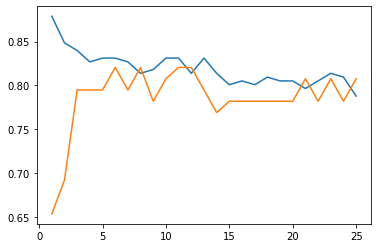

In [99]:
ks = range(1, 26)
accurt = []
accurv = []
Xt, Xv, yt, yv = train_test_split(X0, y)
for k in ks:
    m = KNeighborsClassifier(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

In [100]:
maxi = max(accurv)
index = accurv.index(maxi)
index

5

In [101]:
m = KNeighborsClassifier(5)
_ = m.fit(X0, y)
yhat = m.predict(X0)
confusion_matrix(y, yhat)

array([[142,  23],
       [ 27, 117]], dtype=int64)

In [102]:
accuracy_score(y, yhat), recall_score(y, yhat), precision_score(y, yhat), f1_score(y, yhat)

(0.8381877022653722, 0.8125, 0.8357142857142857, 0.8239436619718309)

When we use just the most influential values, we get much higher scores across all fronts! Our accuracy is not 84% which is considerably higher. Our recall score has improved greatly and is much better especially considering how crucial it is. Our precision score has dropped, but that is necessary in helping our recall score. Lastly the F1 score is not 83% which is much better and more comparable to the accuracy score. This model is much better overall, but still not perfect.